<a href="https://colab.research.google.com/github/LuckyTiwari007/Yes-Bank-Stock-Price-Prediction/blob/main/Yes_Bank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Yes Bank Stock Predication**

# **Projectee Name**    - Lucky Tiwari

##### **Project Type**    - Regression
##### **Contribution**    - Individual

# **Project Summary**

**Problem Statement** - Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.






**Let's Get to know what is stock?**

A Stock or share (also known as a company’s 'equity') is a financial instrument that represents ownership in a company. Units of stock are called "shares." Stocks are bought and sold predominantly on stock exchanges, though there can be private sales as well, and are the foundation of many individual investors' portfolios.

Since, we've the YES BANK Stock price dataset which has the monthly stock prices. It contains the following features:

**Open** - The opening price is the price at which a security first trades upon the opening of an exchange on a trading day i.e. buyers and sellers meet to make deals with the highest bidder, the opening price may not have to be the same as the last day's closing price.

**High**- The high is the highest price at which a stock traded during a period.

**Low** -The low is the highest price at which a stock traded during a period.

**Close** -The closing price is a stock's trading price at the end of a trading day. This makes it the most recent price of a stock until the next trading session. The closing price is calculated as the weighted average price of the last 30 minutes, i.e. from 3:00 PM to 3:30 PM in case of equity.

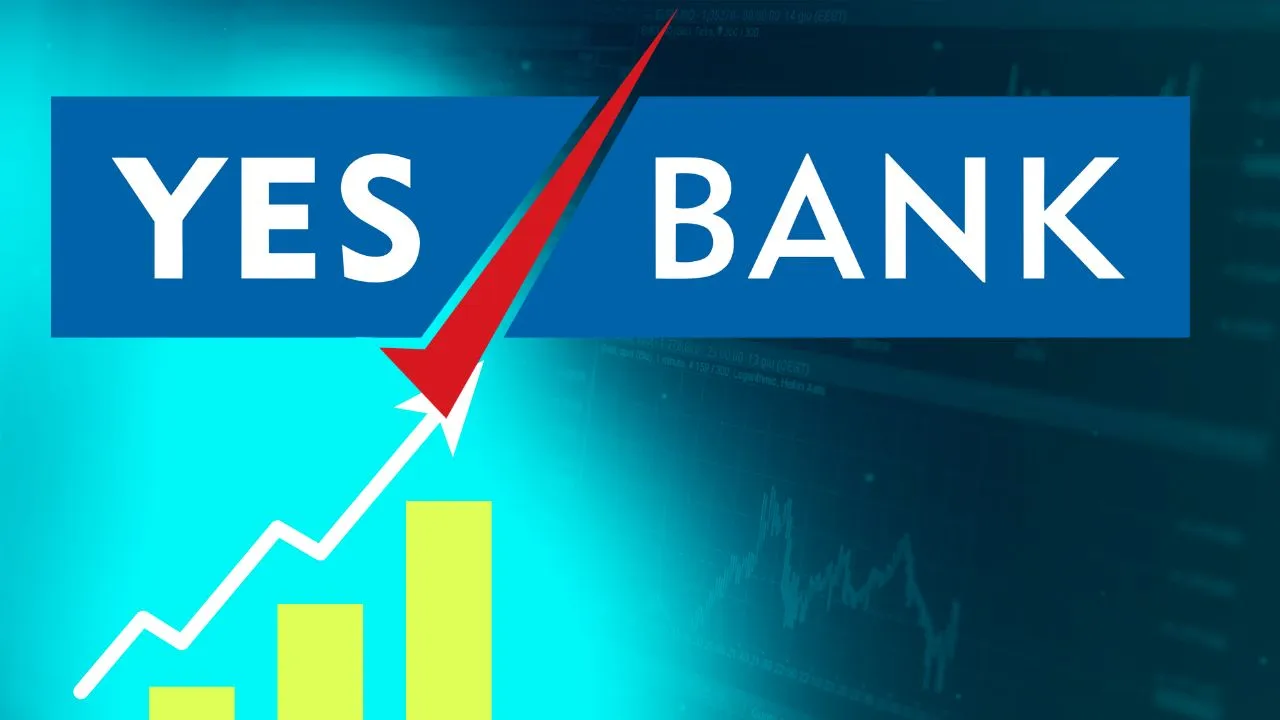

# **GitHub Link -**

# ***Let's Begin !***

In [36]:
# Importing Required Library
import numpy as np
import pandas as pd

# visualize with plots
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
     
from datetime import datetime                          # computational cost



In [4]:
# load the dataset file
df = pd.read_csv('/content/data_YesBank_StockPrices.csv')

In [7]:
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [8]:
df.shape

(185, 5)

In [9]:
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [11]:
# Checking Null Values
df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [12]:
# checking duplicate values
len(df[df.duplicated()])

0

In [13]:
# Date are in object form
# Converting object into datetime 
df['Date'] = df['Date'].apply(lambda x: datetime.strptime(x, "%b-%y")) 

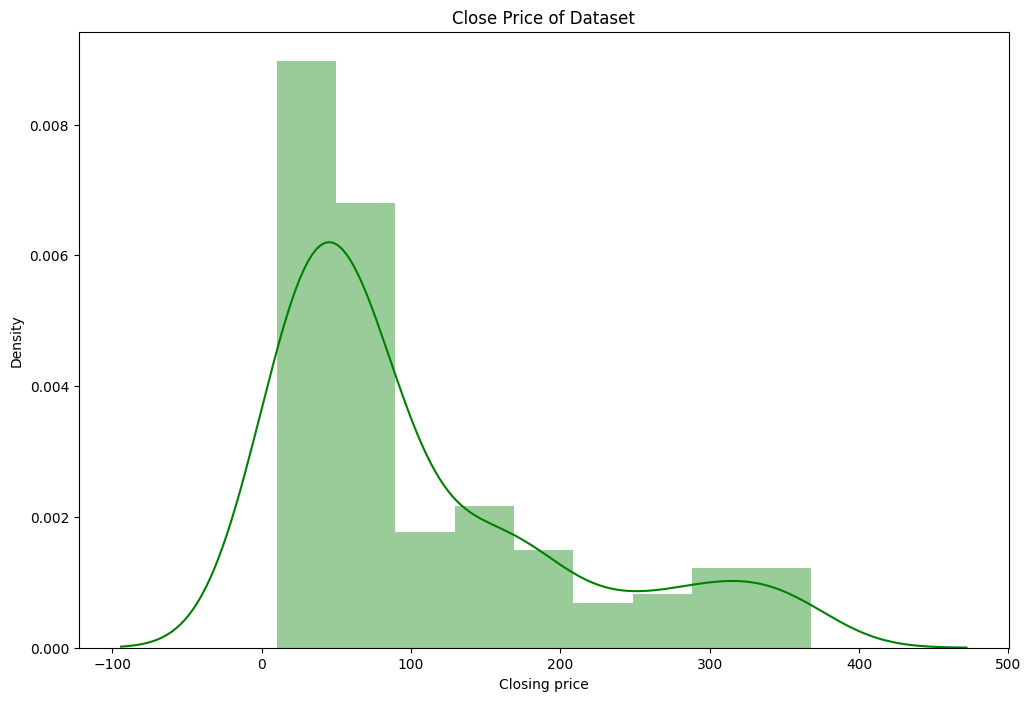

In [14]:
# Check Closing price.
plt.figure(figsize=(12, 8))
sns.distplot(df['Close'],color="g")
plt.title('Close Price of Dataset')
plt.xlabel('Closing price')
plt.show()

# Skewness in the Dataset

**Data Distribution and mean and median of each single Indpendent variable**

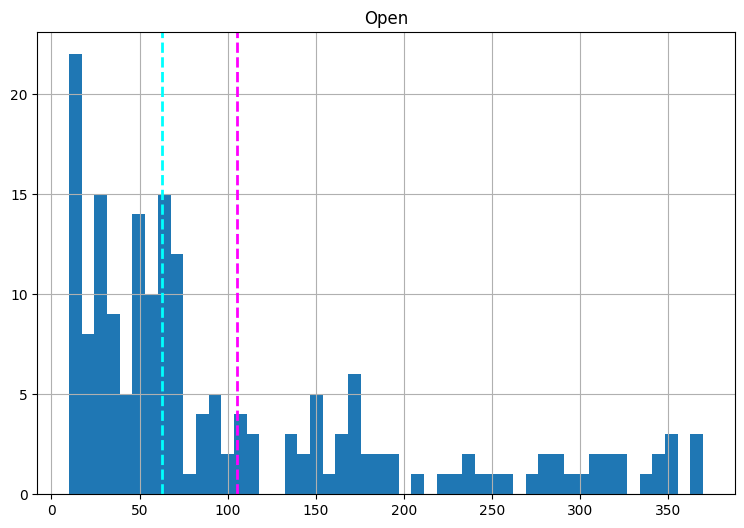

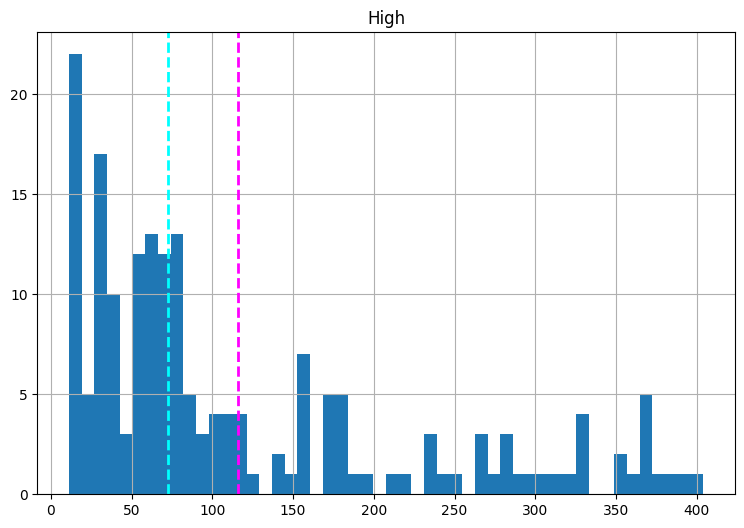

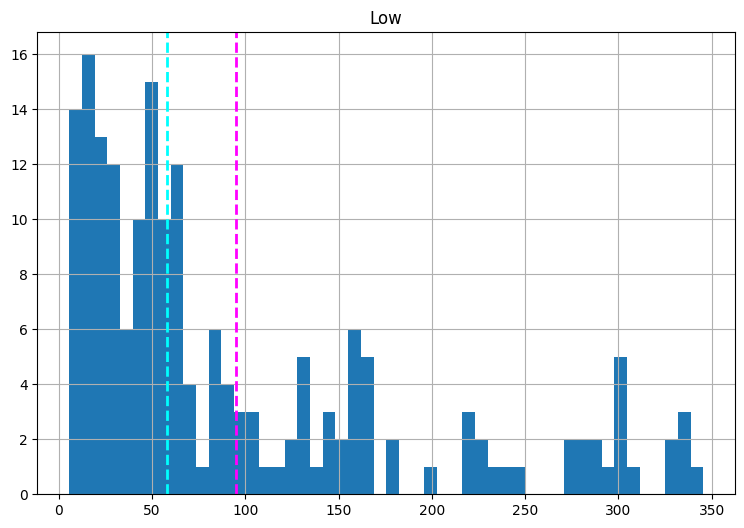

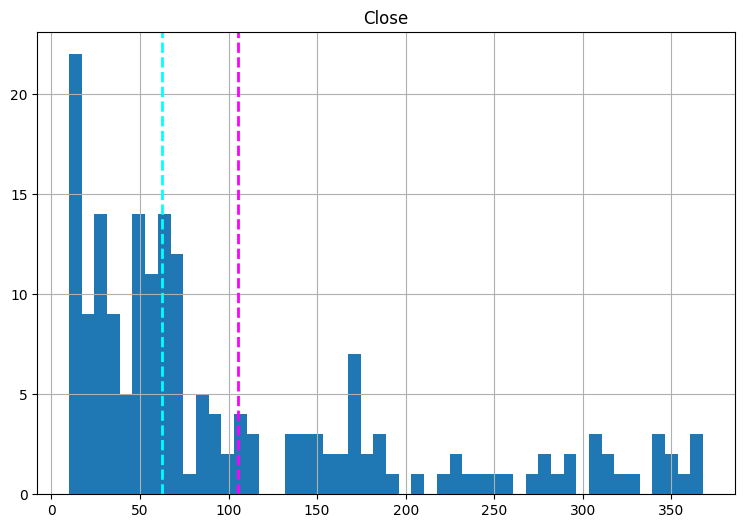

In [15]:
# Check for skewness in the dataset
numeric_features = df.describe().columns
for col in numeric_features[0:4]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

In [37]:
# Data visualisation
fig = px.line(df, df['Date'], df['Close'], title='Monthly closing price')
fig.update_layout(xaxis=dict(title='Year'),
    yaxis=dict(title='Closing price'),
    autosize=False,
    width=1400,
    height=400)

fig.show()

**Dependent variable**

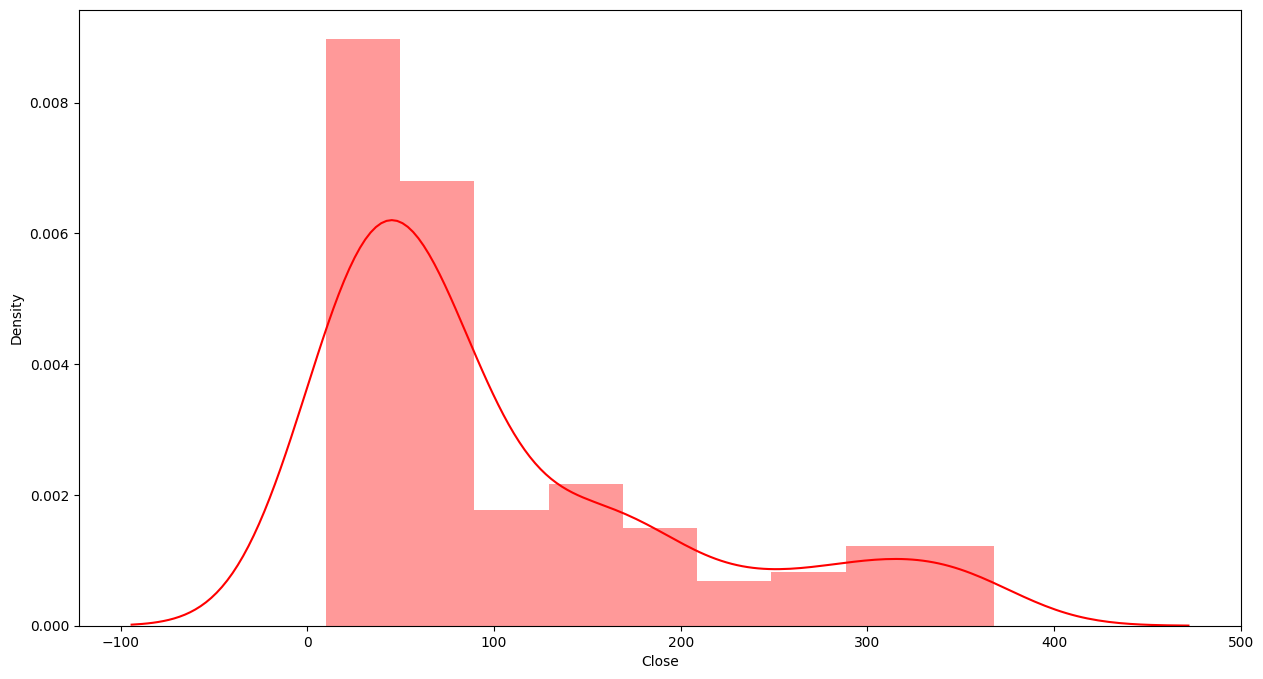

In [51]:
# For dependent variable
plt.figure(figsize=(15,8))
sns.distplot(df['Close'],color='r')
plt.show()

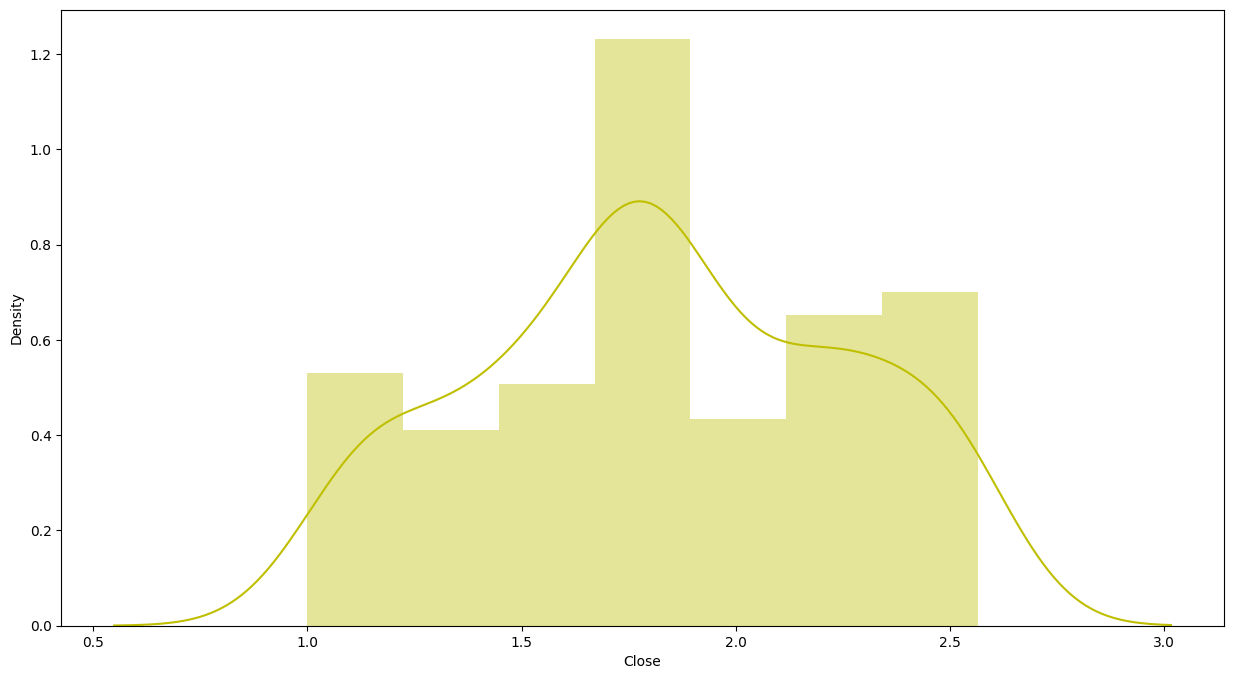

In [63]:
# For normal Distribution 
plt.figure(figsize=(15,8))
sns.distplot(np.log10(df['Close']),color='y')
plt.show()

**Indeoendent Variable**

<Axes: xlabel='Low', ylabel='Density'>

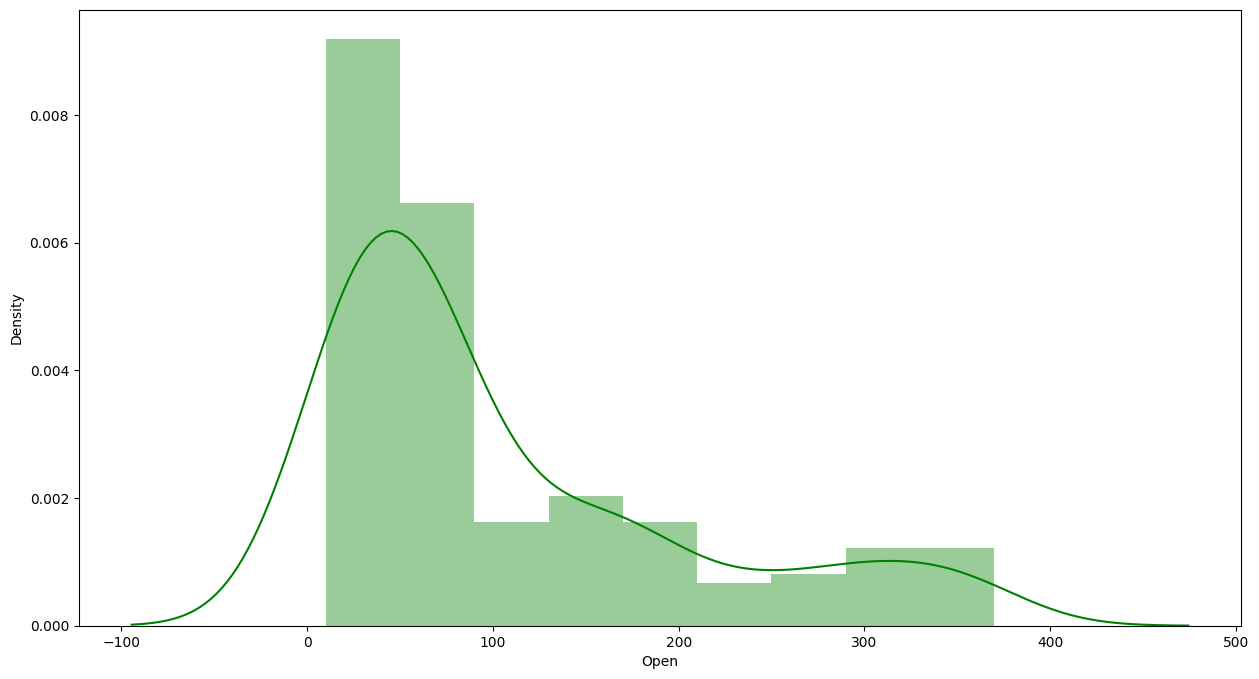

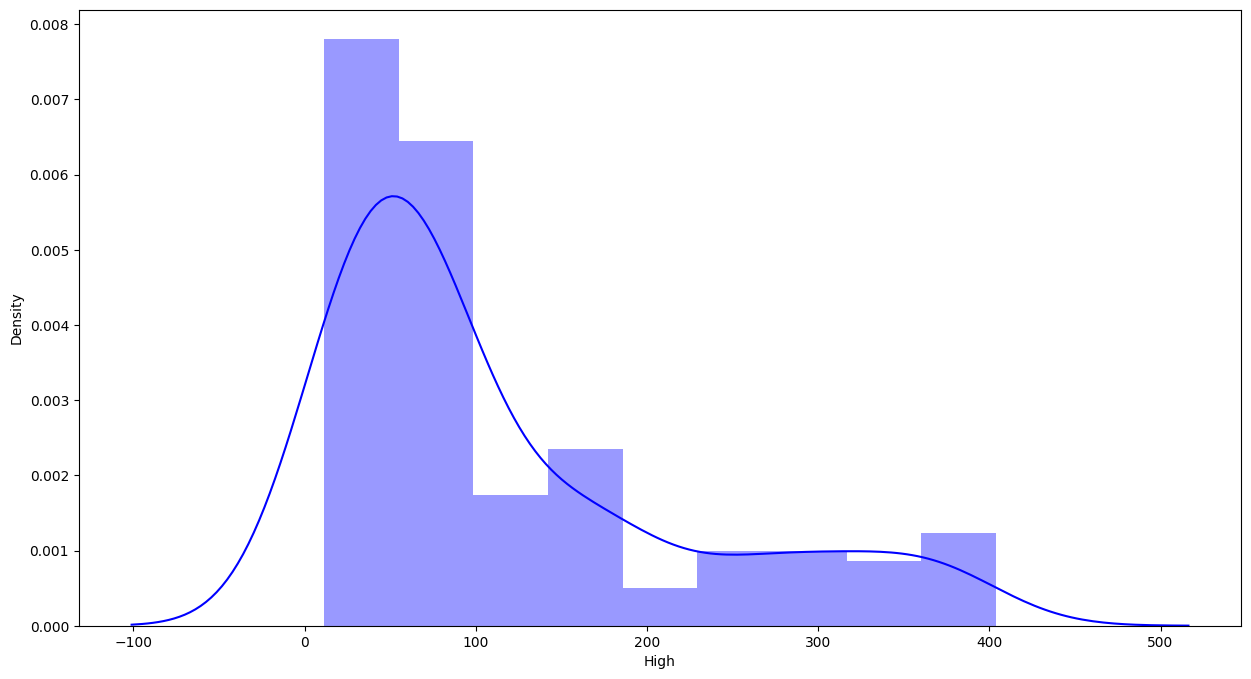

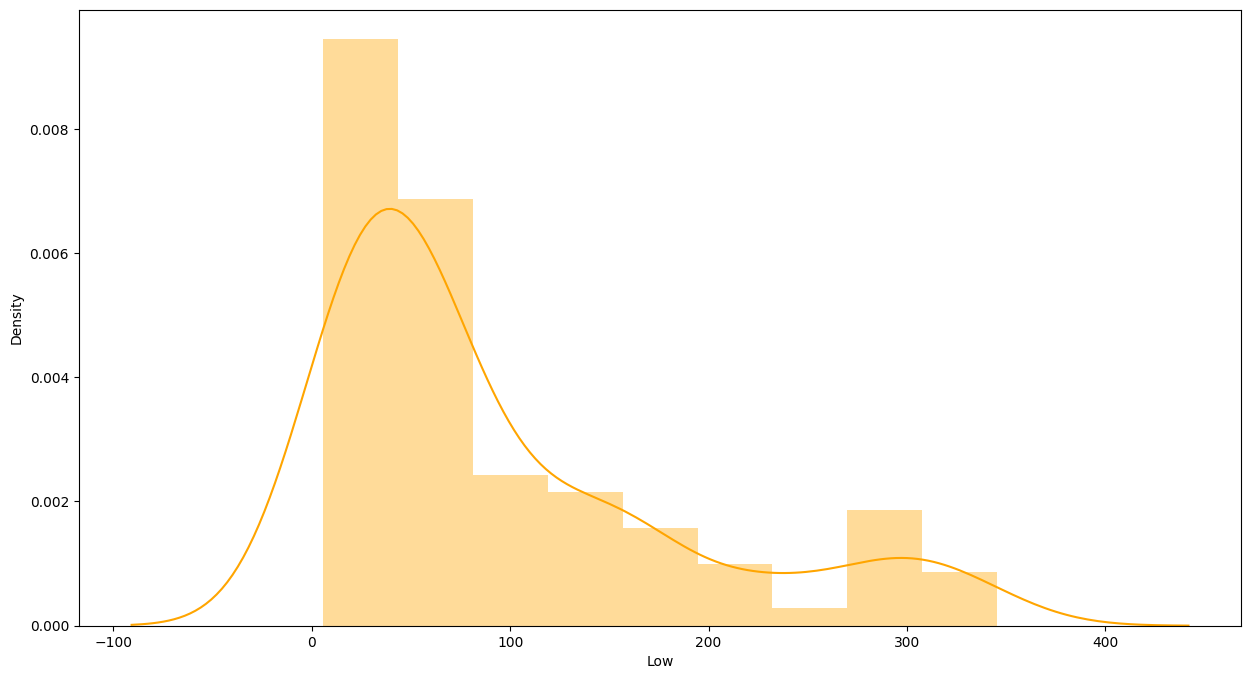

In [61]:
# Independent variables
plt.figure(figsize=(15,8))
sns.distplot(df['Open'], color='g' , )

plt.figure(figsize=(15,8))
sns.distplot(df['High'], color='b')

plt.figure(figsize=(15,8))
sns.distplot(df['Low'], color='orange')

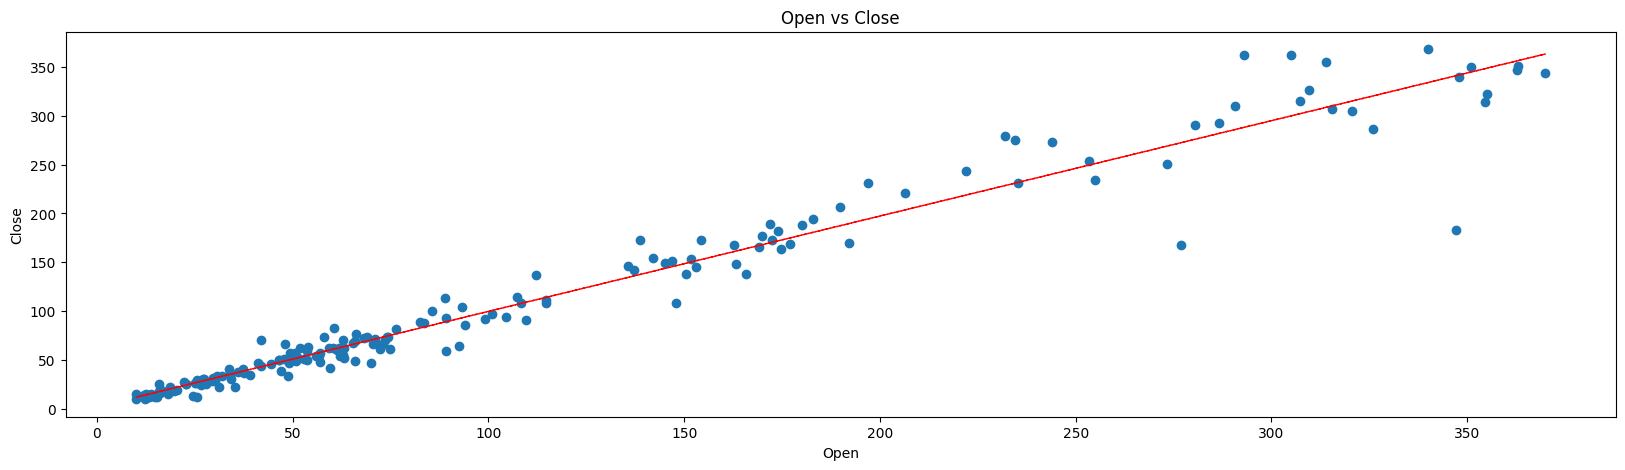

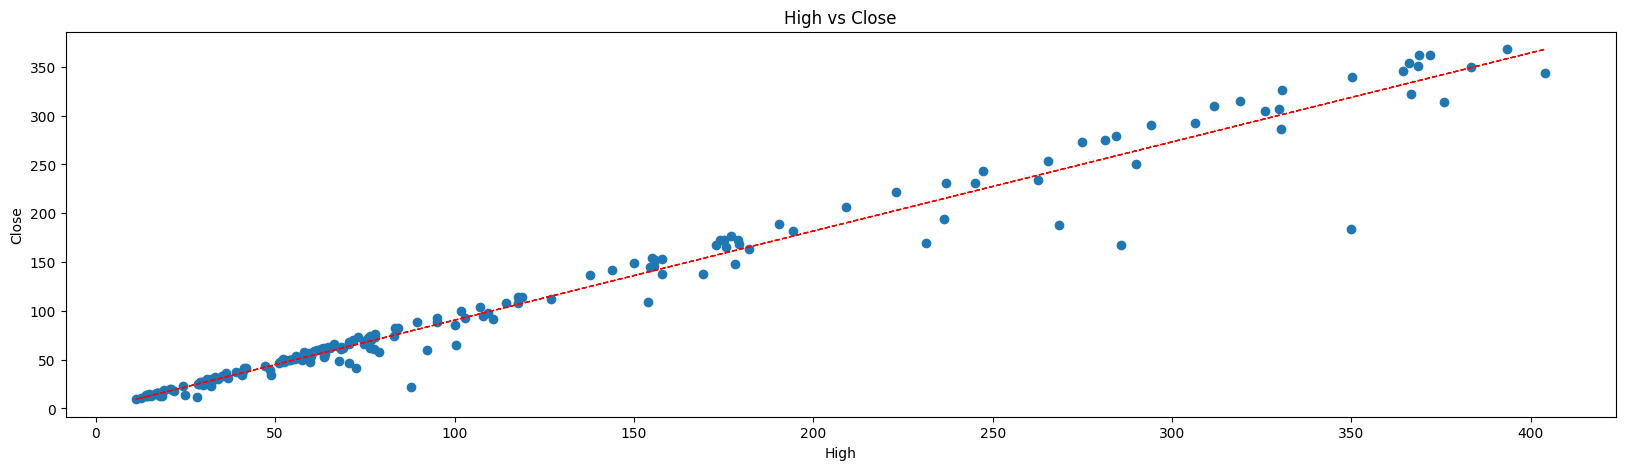

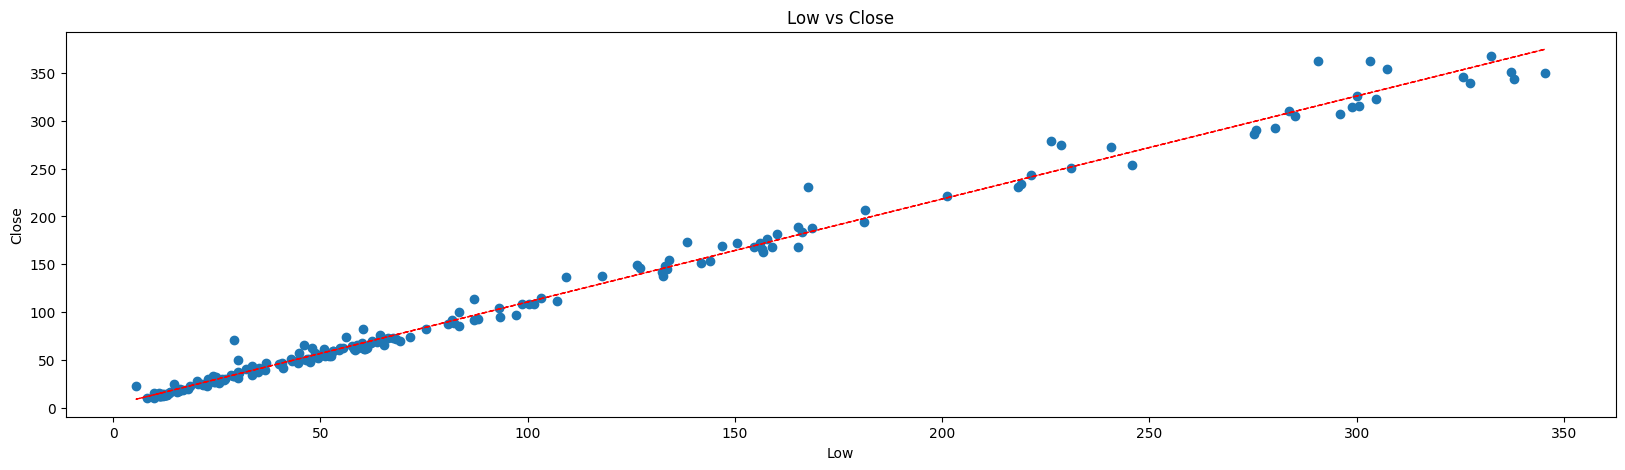

In [17]:
# Scatter plot to see the relationship between variables
for col in df.describe().columns[:-1]:
  fig = plt.figure(figsize=(20,5))
  ax = fig.gca()
  plt.scatter(df[col], df['Close'])
  plt.xlabel(col)
  plt.ylabel('Close')
  ax.set_title('{} vs Close'.format(col))
  z = np.polyfit(df[col], df['Close'], 1)
  y_hat = np.poly1d(z)(df[col])
  plt.plot(df[col], y_hat, "r--", lw=1)
  plt.show()

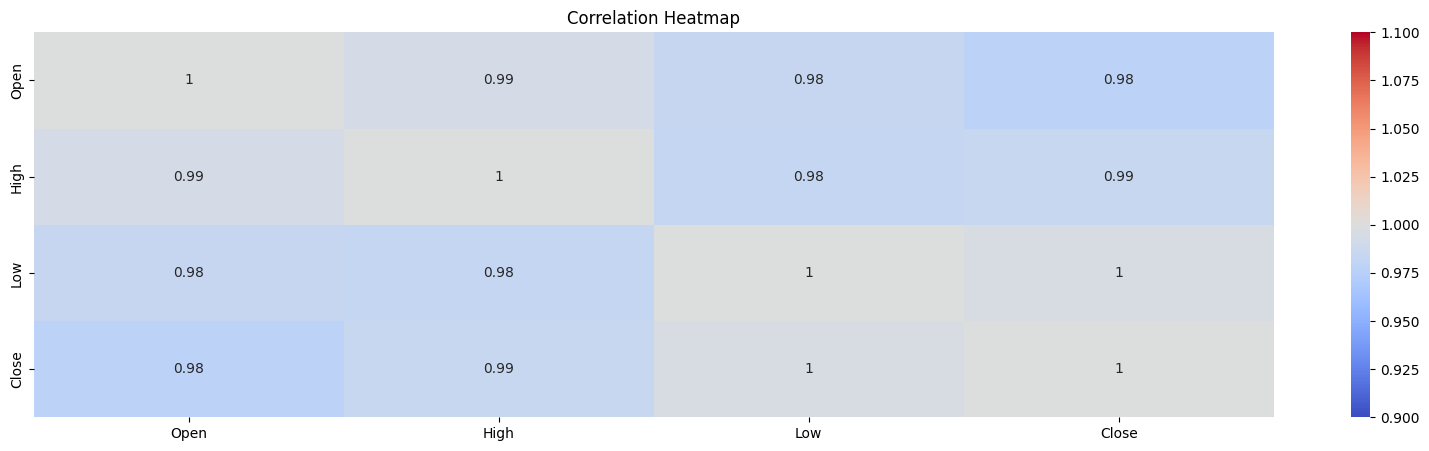

In [18]:
# Existence of corelation
plt.figure(figsize=(20,5))
plt.title('Correlation Heatmap')
cor = sns.heatmap(df.corr(), vmin=1, vmax=1, cmap='coolwarm', annot=True)

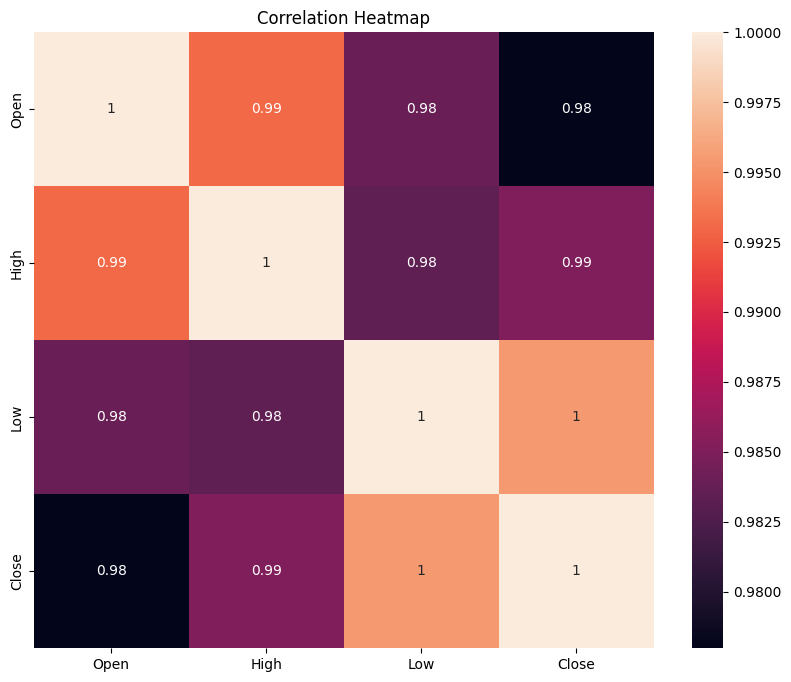

In [19]:
#Correlation betwwen features
plt.figure(figsize=(10,8), )
sns.heatmap(df.corr(),annot = True, )
plt.title('Correlation Heatmap')
plt.show()

In [20]:

# Splitting our data into Dependent and Independent Variables
X = df.drop(columns=['Close','Date']).apply(zscore)
y = np.log10(df['Close'])

**Creating Train Test Split**

In [21]:
# Creating Testing and training Datasets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state = 1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(148, 3)
(37, 3)
(148,)
(37,)


# **Regression Models**

### Linear Regrassion

In [22]:
reg = LinearRegression()
reg_model = reg.fit(X_train,y_train)

reg.score(X_train,y_train)

0.8146653424416905

In [23]:
reg.intercept_


1.8292785179315048

In [24]:
reg.coef_

array([-0.04654099,  0.19795929,  0.23173905])

**Prediction**

In [25]:
y_test_pred = reg.predict(X_test)
y_train_pred = reg.predict(X_train)

**Evaluation Matrices**

In [26]:
# Test Performance

print("MSE :",mean_squared_error(y_train, y_train_pred))
print("RMSE :",math.sqrt(mean_squared_error(y_train,y_train_pred)))
print("MAE :",mean_absolute_error(y_train, y_train_pred))
print("R2 :", r2_score(y_train, y_train_pred))

MSE : 0.033659395765946676
RMSE : 0.18346497149577812
MAE : 0.1559169766820056
R2 : 0.8146653424416905


**Linear Regression Predication vs. Actual**

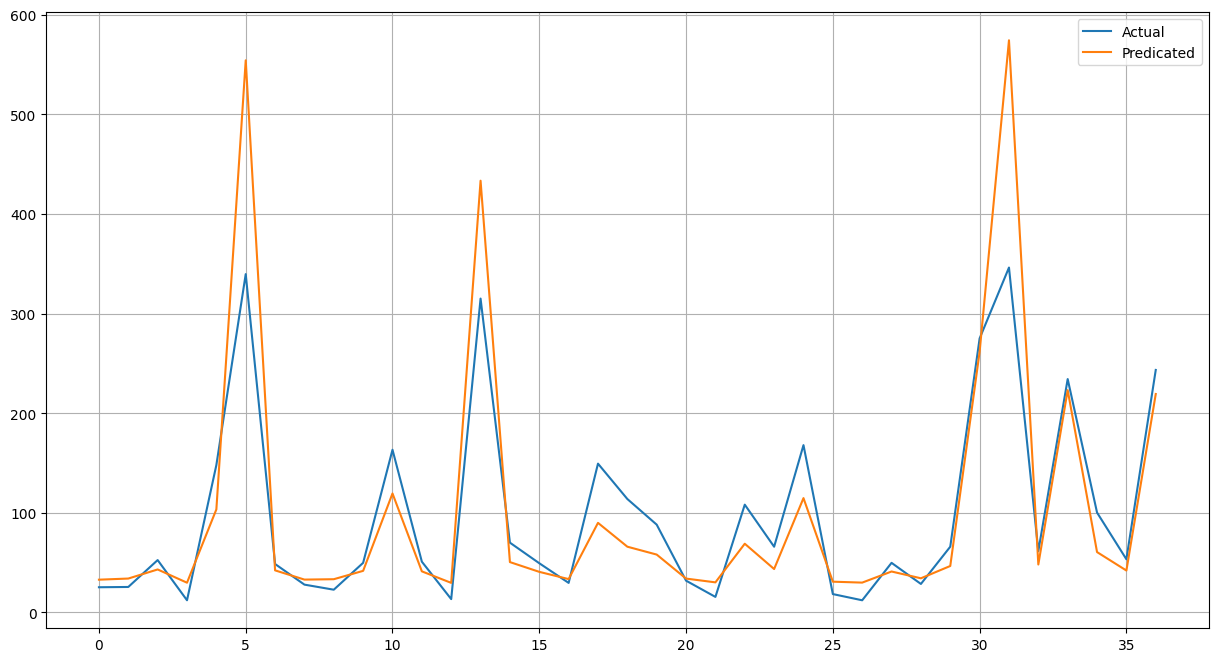

In [27]:
# Linear Regression Plotting

plt.figure(figsize=(15,8))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_test_pred))
plt.legend(['Actual','Predicated'])
plt.grid()
plt.show()

# Lasso Regression

In [28]:
from sklearn.linear_model import Lasso         # Importing Lasso regression
lasso = Lasso(alpha=0.005,max_iter=3000)
lasso_model = lasso.fit(X_train,y_train)

In [29]:
lasso.score(X_train,y_train)

0.8143673030311667

**Prediction**

In [30]:
y_lasso_pred = lasso.predict(X_test)

**Evaluation Matrices**

In [31]:
# Test Performance

print("MSE :",mean_squared_error(y_test,y_lasso_pred))
print("RMSE :",math.sqrt(mean_squared_error(y_test,y_lasso_pred)))
print("MAE :",mean_absolute_error(y_test, y_lasso_pred))
print("R2 :"),r2_score(y_test,y_lasso_pred)

MSE : 0.03204505144876297
RMSE : 0.17901131653826516
MAE : 0.15232245780607623
R2 :


(None, 0.8199714923878543)

**Lasso Predication vs. Actual**

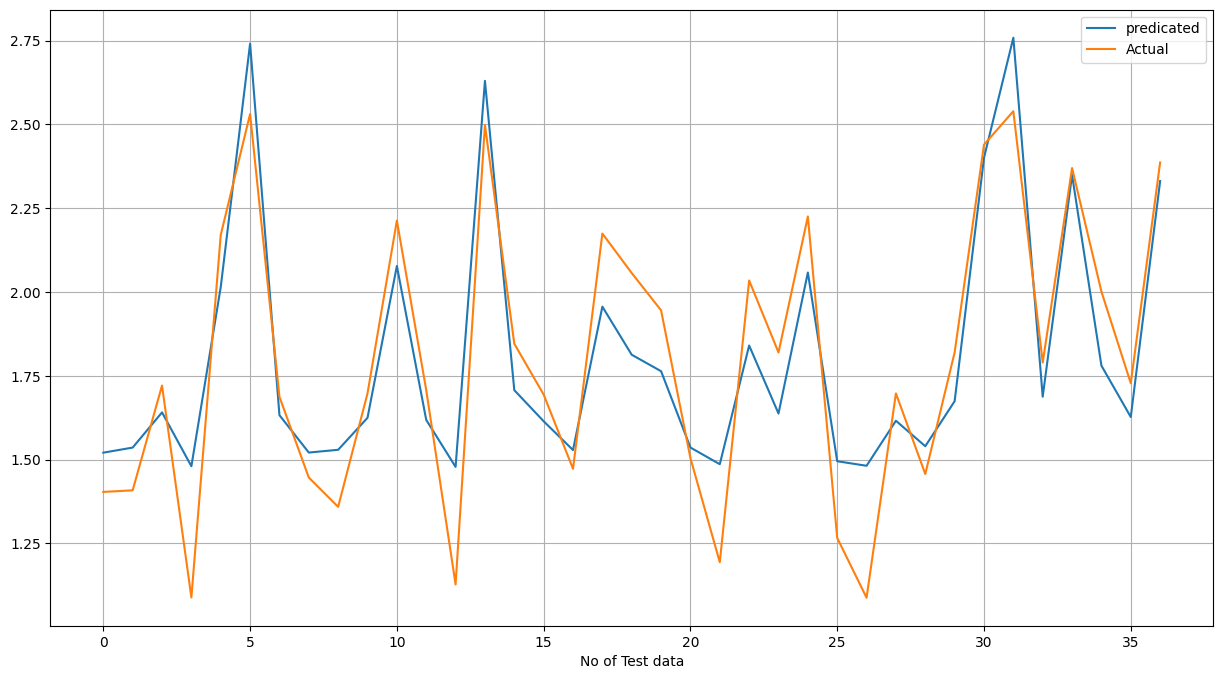

In [32]:
plt.figure(figsize=(15,8))
plt.plot(y_lasso_pred)
plt.plot(np.array(y_test))
plt.legend(["predicated", "Actual"])
plt.xlabel('No of Test data')
plt.grid()
plt.show()

# Cross Verification

In [33]:
#Importing GridSearchCV  for Cross Validification
from sklearn.model_selection import GridSearchCV  

In [47]:

# Hyper Parameter Tuning

lasso_cv =Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_model = GridSearchCV(lasso_cv, parameters,scoring='neg_mean_squared_error', cv = 3)


In [38]:
lasso_model.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [40]:
print("The best fit alpha value is found out to be :" ,lasso_model.best_params_)
print("\nUsing ",lasso_model.best_params_, " the negative mean squared error is: ", lasso_model.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -0.03515384844892758


**Prediction**:

In [41]:
y_pred_lasso = lasso_model.predict(X_test)

**Evaluation Matrices**

In [44]:
# Test Performance

print("MSE :", mean_squared_error(y_test,y_pred_lasso))
print("RMSE :",math.sqrt(mean_squared_error(y_test,y_pred_lasso)))
print("MAE :",mean_absolute_error(y_test, y_pred_lasso))
print("R2 :",r2_score(y_test, y_pred_lasso))

MSE : 0.03222273336072056
RMSE : 0.17950691730604856
MAE : 0.15277731058358668
R2 : 0.8189732786857935


**Lasso Prediction vs. Actual (After)**

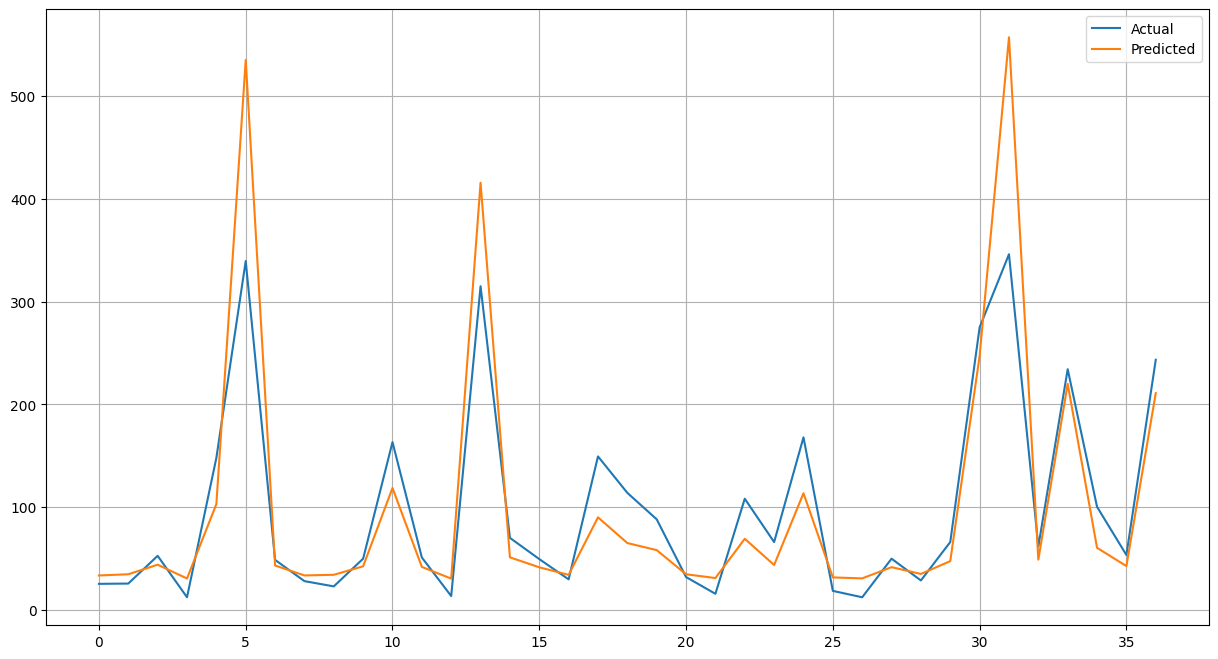

In [46]:
# Lasso Plotting

plt.figure(figsize=(15,8))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_lasso))
plt.legend(['Actual','Predicted'])
plt.grid()
plt.show()

# **Final Conclusion**

*   We started with data inspection, viewed the data distribution, checked for correlation and used averaged features to remove correlation.
*   A simple linear regression model was built and it was evaluated using accuracy, mean squared error, root mean squared error, r2_score and mean absolute percentage error.
*   Additional features were engineered by taking lags and reduced the effect of multi collinearity using regularization techniques such as ridge, lasso and elastic net regression.




